# MACHINE LEARNING DO ZERO EM PYTHON

## 1 - Carregando Bibliotecas

In [1]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Para manipulação de dados
import pandas as pd
import numpy as np

# Para gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv

# Para modelagem
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

#### Settings #####
pd.set_option('max_colwidth',1000)
pd.set_option('max_rows',20)
pd.set_option('max_columns',1000)
pd.set_option('precision',2)
pd.options.display.float_format = '{:,.2f}'.format
plt.style.use("classic")


In [3]:
#carregando dataset
df = pd.read_csv("german_credit_data.csv", index_col = 0)

In [4]:
#primeiras linhas
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
#ultimas linhas
df.tail(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
990,37,male,1,own,NaN,NaN,3565,12,education,good
991,34,male,1,own,moderate,NaN,1569,15,radio/TV,good
992,23,male,1,rent,NaN,little,1936,18,radio/TV,good
993,30,male,3,own,little,little,3959,36,furniture/equipment,good
994,50,male,2,own,NaN,NaN,2390,12,car,good
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,27,male,2,own,moderate,moderate,4576,45,car,good


In [6]:
# informações das variaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [7]:
#número de linhas e colunas
df.shape

(1000, 10)

In [8]:
#printando texto no meio da string
x = 10
print(f"O valor de x é {x}")

O valor de x é 10


In [9]:
pip install pandasql3

Note: you may need to restart the kernel to use updated packages.


In [10]:
#usar f-string dentro de queries
import pandasql as ps

filtro_idade = 70
query = f"""
    select * from df
    where age < {filtro_idade}
"""
ps.sqldf(query,locals())

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,None,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,None,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
988,31,female,1,own,little,None,1736,12,furniture/equipment,good
989,40,male,3,own,little,little,3857,30,car,good
990,38,male,2,own,little,None,804,12,radio/TV,good
991,23,male,2,free,little,little,1845,45,radio/TV,bad


In [11]:
# Acessar elementos: loc e o iloc
df.iloc[0:4, 0:7] #acessando um intervalo aberto na direita

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount
0,67,male,2,own,NaN,little,1169
1,22,female,2,own,little,moderate,5951
2,49,male,1,own,little,NaN,2096
3,45,male,2,free,little,little,7882


In [12]:
# outro modo de acessar elementos
df.loc[0:3, "Age"]

0    67
1    22
2    49
3    45
Name: Age, dtype: int64

In [13]:
df.loc[0:3, ["Age","Sex","Job"]]

,Age,Sex,Job
0,67,male,2
1,22,female,2
2,49,male,1
3,45,male,2


In [14]:
#tambem ir pelo nome da coluna como indice
novo_data_frame = df[["Age","Sex","Job"]]
novo_data_frame.head()

,Age,Sex,Job
0,67,male,2
1,22,female,2
2,49,male,1
3,45,male,2
4,53,male,2


In [15]:
# Estatisticas descritiva
df.describe()

,Age,Job,Credit amount,Duration
count,"1,000.00","1,000.00","1,000.00","1,000.00"
mean,35.55,1.90,"3,271.26",20.90
std,11.38,0.65,"2,822.74",12.06
min,19.00,0.00,250.00,4.00
25%,27.00,2.00,"1,365.50",12.00
50%,33.00,2.00,"2,319.50",18.00
75%,42.00,2.00,"3,972.25",24.00
max,75.00,3.00,"18,424.00",72.00


In [16]:
# Estatistica descritiva por grupo(group by)
list = ["Age","Credit amount","Duration"]
df.groupby("Sex")[list].mean()

,Age,Credit amount,Duration
Sex,,,
female,32.80,"2,877.77",19.44
male,36.78,"3,448.04",21.56


In [17]:
list2 = ["Age","Credit amount","Duration"]
df.groupby("Purpose")[list2].mean()

,Age,Credit amount,Duration
Purpose,,,
business,35.48,"4,158.04",26.94
car,37.14,"3,768.19",20.81
domestic appliances,34.25,"1,498.00",16.83
education,38.29,"2,879.20",19.68
furniture/equipment,32.46,"3,066.99",19.29
radio/TV,34.70,"2,487.65",20.05
repairs,38.55,"2,728.09",19.09
vacation/others,39.92,"8,209.33",32.33


In [18]:
# % de missing e soma
df.isna().mean()

Age                0.00
Sex                0.00
Job                0.00
Housing            0.00
Saving accounts    0.18
Checking account   0.39
Credit amount      0.00
Duration           0.00
Purpose            0.00
Risk               0.00
dtype: float64

In [19]:
# soma
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [20]:
# olhando variaveis categoricas
df.Housing.value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [21]:
df.Sex.value_counts()

male      690
female    310
Name: Sex, dtype: int64

In [22]:
#percentual
df.Sex.value_counts(normalize=True).sort_index()

female   0.31
male     0.69
Name: Sex, dtype: float64

In [23]:
# pegando o nome das colunas
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [24]:
# Filtros
# Query para lógica
df.query("Age > 70")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
186,74,female,3,free,little,moderate,5129,9,car,bad
330,75,male,3,free,little,little,6615,24,car,good
430,74,male,1,own,little,NaN,3448,5,business,good
536,75,female,3,own,NaN,little,1374,6,car,good
606,74,male,3,own,little,NaN,4526,24,business,good
756,74,male,0,own,little,rich,1299,6,car,good


In [25]:
homens_velhos = df.query("Age > 70 & Sex == 'male'")
homens_velhos.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
330,75,male,3,free,little,little,6615,24,car,good
430,74,male,1,own,little,NaN,3448,5,business,good
606,74,male,3,own,little,NaN,4526,24,business,good
756,74,male,0,own,little,rich,1299,6,car,good


In [26]:
# Método para inferir se a variavel é categorica
provavel_cat = {}

for var in df.columns:
    provavel_cat[var] = 1.0 * df[var].nunique() / df[var].count() < 0.03

provavel_cat    

{'Age': False,
 'Sex': True,
 'Job': True,
 'Housing': True,
 'Saving accounts': True,
 'Checking account': True,
 'Credit amount': False,
 'Duration': False,
 'Purpose': True,
 'Risk': True}

In [27]:
df["Target"] = np.where(df["Risk"] == "bad",1,0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Target
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,1
2,49,male,1,own,little,NaN,2096,12,education,good,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,0
4,53,male,2,free,little,little,4870,24,car,bad,1


In [28]:
df.drop("Risk",axis=1,inplace=True)

In [29]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Target
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,0
996,40,male,3,own,little,little,3857,30,car,0
997,38,male,2,own,little,NaN,804,12,radio/TV,0
998,23,male,2,free,little,little,1845,45,radio/TV,1


In [30]:
df.Target.value_counts(normalize=True)

0   0.70
1   0.30
Name: Target, dtype: float64

## 3 - ANÁLISE EXPLORATÓRIA

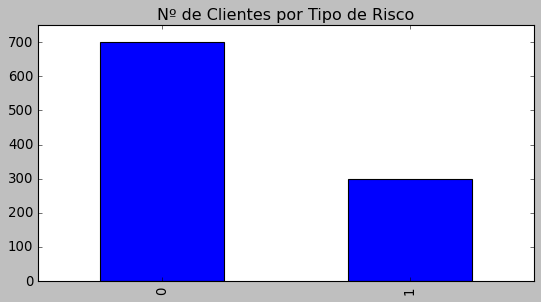

In [31]:
#plot com pandas
_ = plt.figure(figsize=(8,4))
_ = df.Target.value_counts().plot(kind="bar")
_ = plt.title("Nº de Clientes por Tipo de Risco")
_ = plt.ylim(0,750)

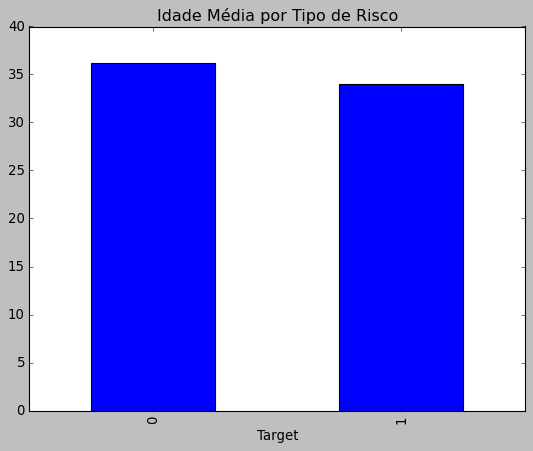

In [32]:
_ = df.groupby("Target")["Age"].mean().plot(kind="bar")
_ = plt.title("Idade Média por Tipo de Risco")

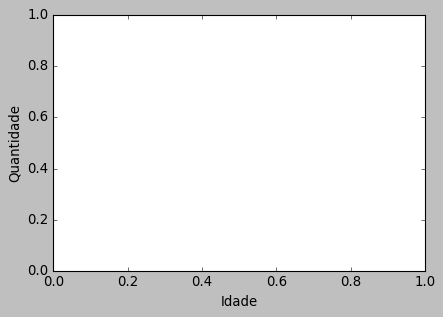

In [33]:
##plots com matplotlib(foco na hierarquia)
#Grafico sendo construído por partes
_ = plt.figure(figsize=(6,4))
_ = plt.xlabel("Idade")
_ = plt.ylabel("Quantidade")

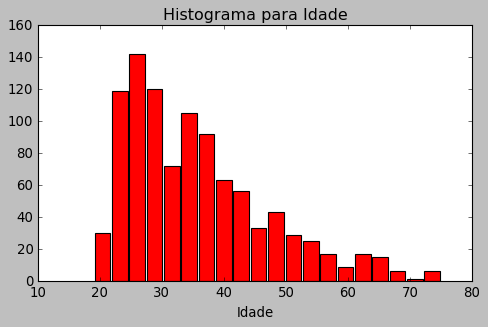

In [34]:
# Adicionando elementos ao desenho
_ = plt.figure(figsize=(7,4))
_ = plt.hist(data=df, x="Age", bins=20, rwidth=0.9, color="red")
_ = plt.xlabel("Idade")
_ = plt.title("Histograma para Idade")

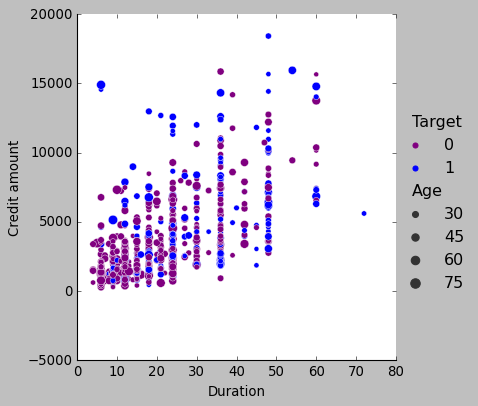

In [35]:
_ = sns.relplot(x="Duration",y="Credit amount",hue="Target",palette=["purple","blue"],size="Age", data=df)

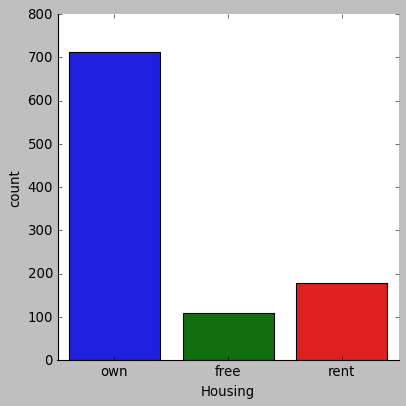

In [36]:
#Gráfico de contagem por categoria
_ = sns.catplot(x="Housing", kind="count",data=df)

In [37]:
#Dashes Automatizados
## Dashboard com uma única linha
reporte = sv.analyze(df)
reporte.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 4. MODELAGEM DE MACHINE LEARNING: RANDOM FOREST

In [38]:
# Listar as features que vamos utilizar
features = ["Age","Job","Credit amount","Purpose","Housing","Duration"]
target = "Target"

In [39]:
# Agora, dividimos antes de qualquer pré-processamento

x = df[features]
y = df[target]

#Dividindo em treino e teste
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size= 0.3, random_state=999)

In [40]:
cat_features = ["Job","Housing","Purpose"]
num_features = ["Age","Credit amount","Duration"]

In [41]:
!pip install category-encoders

You should consider upgrading via the 'c:\users\usuario\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [42]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=cat_features)

x_train = encoder.fit_transform(x_train)

x_train

C:\Users\Usuario\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Age,Job_1,Job_2,Job_3,Job_4,Credit amount,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_7,Purpose_8,Housing_1,Housing_2,Housing_3,Duration
763,30,1,0,0,0,12680,1,0,0,0,0,0,0,0,1,0,0,21
534,25,0,1,0,0,3105,0,1,0,0,0,0,0,0,0,1,0,24
86,27,0,1,0,0,1295,0,0,1,0,0,0,0,0,0,1,0,18
927,39,0,1,0,0,10297,1,0,0,0,0,0,0,0,1,0,0,48
134,21,0,1,0,0,10144,0,1,0,0,0,0,0,0,0,1,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,46,1,0,0,0,2476,1,0,0,0,0,0,0,0,0,1,0,21
481,26,0,1,0,0,1201,1,0,0,0,0,0,0,0,0,1,0,24
869,24,0,1,0,0,652,0,0,1,0,0,0,0,0,0,0,1,12
348,34,0,0,1,0,1743,0,0,0,1,0,0,0,0,0,1,0,6


In [43]:
x_test = encoder.transform(x_test)

x_test.head()

,Age,Job_1,Job_2,Job_3,Job_4,Credit amount,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_7,Purpose_8,Housing_1,Housing_2,Housing_3,Duration
842,23,0,1,0,0,1943,0,0,0,0,1,0,0,0,0,1,0,18
68,37,0,1,0,0,1819,0,0,0,0,0,0,0,1,1,0,0,36
308,24,0,1,0,0,1237,0,0,1,0,0,0,0,0,0,1,0,8
881,48,0,1,0,0,9277,1,0,0,0,0,0,0,0,1,0,0,24
350,23,0,1,0,0,1236,0,0,0,0,0,0,1,0,0,0,1,9


In [44]:
clf_RF = RandomForestClassifier()
clf_RF.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
#aplica no teste
y_pred = clf_RF.predict(x_test)

y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
from sklearn.metrics import accuracy_score

print("Acuracia: " + str(accuracy_score(y_test,y_pred)))

from sklearn.metrics import f1_score

#Indica poucos falsos positivos e falsos negativos, quanto mais próximo de 1,melhor
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

Acuracia: 0.6366666666666667
F1 Score: 0.2377622377622378


In [47]:
from sklearn.metrics import confusion_matrix

print("Matriz de Confusão: \n:" + str(confusion_matrix(y_test,y_pred)))

Matriz de Confusão: 
:[[174  25]
 [ 84  17]]


In [49]:
tn , fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

print("True Negative: " + str(tn))
print("False Positive: " + str(fp))
print("False Negative: " + str(fn))
print("True Positivo: " + str(tp))

True Negative: 174
False Positive: 25
False Negative: 84
True Positivo: 17


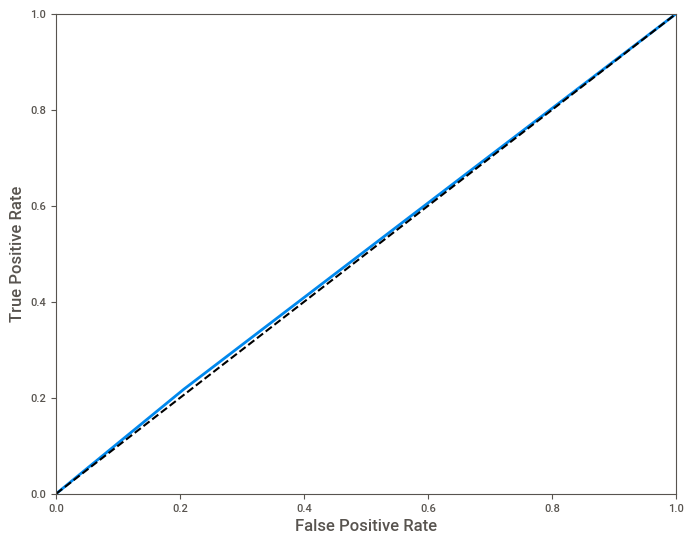

In [53]:
#CURVA ROC: calcula fpr e tpr para vários limiares
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(clf_RF,x_test,y_test)

fpr,tpr,thresholds = roc_curve(y_test,y_scores)

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],"k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
plot_roc_curve(fpr,tpr)

In [54]:
clf_RF.feature_importances_

array([0.23761274, 0.02054829, 0.02399788, 0.02279   , 0.00628114,
       0.31955155, 0.02818964, 0.02040696, 0.02046783, 0.0155812 ,
       0.01124462, 0.00338574, 0.00524491, 0.01561675, 0.01348512,
       0.02361236, 0.01623287, 0.1957504 ])

In [55]:
feature_imp = pd.Series(clf_RF.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp

Credit amount   0.32
Age             0.24
Duration        0.20
Purpose_1       0.03
Job_2           0.02
Housing_2       0.02
Job_3           0.02
Job_1           0.02
Purpose_3       0.02
Purpose_2       0.02
Housing_3       0.02
Purpose_8       0.02
Purpose_4       0.02
Housing_1       0.01
Purpose_5       0.01
Job_4           0.01
Purpose_7       0.01
Purpose_6       0.00
dtype: float64

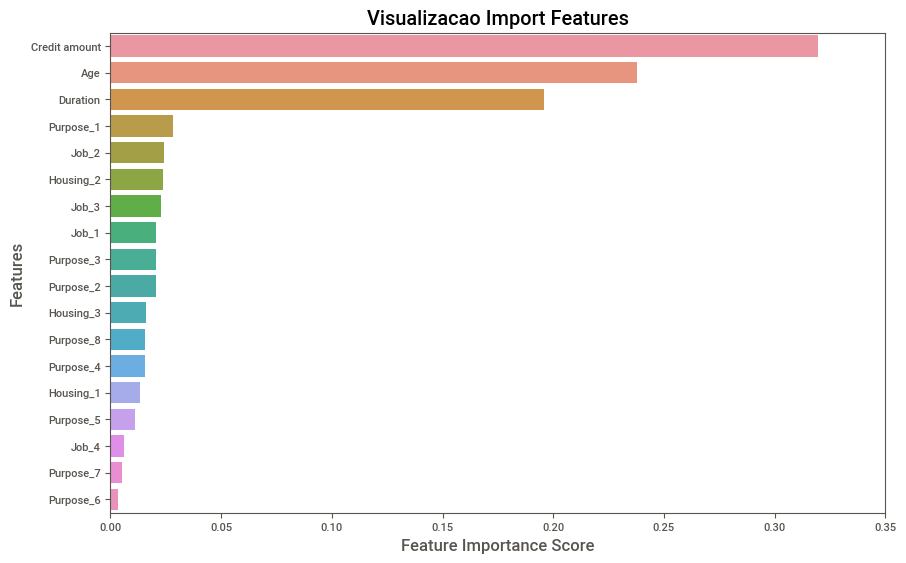

In [57]:
#Creating a bar plot
_ = plt.figure(figsize=(10,6))
_ = sns.barplot(x=feature_imp,y=feature_imp.index)

#Add labels to your graph
_ = plt.xlabel("Feature Importance Score")
_ = plt.ylabel("Features")
_ = plt.title("Visualizacao Import Features")
_ = plt.savefig("rf_features.png")

In [59]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint

# Tunando os hiperparâmetros:
model_params = {
    # randomly sample numbers from 4 to 204 estimators
    "n_estimators": randint(4, 200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    "max_features": truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    "min_samples_split": uniform(0.01, 0.199),
}

# create random forest classifier model
rf_model = RandomForestClassifier()

# set up random search meta-estimator
# this will train 100 models over 5 folds of cross validation (500 models total)
clf = RandomizedSearchCV(rf_model, model_params, n_iter=10, cv=5, random_state=1)

# train the random search meta-estimator to find the best model out of 100 candidates
model = clf.fit(x_train, y_train)

# print winning set of hyperparameters
from pprint import pprint

pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 0.27616377599617853,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 0.039204422272605496,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 148,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [60]:

# Qual combinação de parâmetros trouxe melhor resultado:
model.best_estimator_

RandomForestClassifier(max_features=0.27616377599617853,
                       min_samples_split=0.039204422272605496,
                       n_estimators=148)

In [62]:
clf_random = RandomForestClassifier(
    max_features=0.3124639258611636,
    min_samples_split=0.05068599769657197,
    n_estimators=160,
)

clf_random.fit(x_train, y_train)

RandomForestClassifier(max_features=0.3124639258611636,
                       min_samples_split=0.05068599769657197, n_estimators=160)

In [63]:

y_pred_random = clf_random.predict(x_test)

print("Acurácia: " + str(accuracy_score(y_test, y_pred_random)))

print("F1 Score: {}".format(f1_score(y_test, y_pred_random)))

Acurácia: 0.6733333333333333
F1 Score: 0.22222222222222224
